# U.S. Medical Insurance Costs

![alt text](insuranse.jpeg)

### Project goal

Introduction: As we delve into the intricate world of insurance, our mission is to uncover valuable insights that drive informed decisions. By combining data science methodologies with domain expertise, we aim to enhance risk assessment, optimize pricing strategies, and elevate customer experiences. Our analyses serve as a compass, guiding insurance professionals toward sustainable growth, innovation, and client-centric solutions.

Goal: Our overarching goal is twofold:

Precision Pricing and Personalization:
Develop robust predictive models that accurately estimate insurance premiums based on individual characteristics (such as age, BMI, smoking status, and family composition).
Enable insurance agents to tailor policies, ensuring fair pricing and personalized coverage for each client.
Strive for transparency, trust, and alignment between insurers and policyholders.
Risk Mitigation and Strategic Insights:
Identify risk factors, outliers, and trends within our data.
Equip insurance companies with actionable insights to mitigate risks, optimize underwriting processes, and enhance portfolio management.
Foster a culture of continuous learning, adaptability, and data-driven decision-making.
In summary, our journey through data exploration, modeling, and interpretation aims to empower insurance professionals, enhance industry practices, and ultimately provide peace of mind to policyholders


* 

In [28]:
import pandas as pd
data = pd.read_csv("/Users/glenn/Documents/Visual code workspace/Data Science/Projects/us_medical_insurance/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Cleaning

In [29]:
data.shape

(1338, 7)

In [30]:
#looking for missing values 

data.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [31]:
#Looking for NANS
data.isna().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

We have non null errors in our dataset. and no NAN 

In [32]:
# Looking for duplicates
data.duplicated().count()

1338

We have no duplicates.
We now want to look at data types, to se if we must do any data Conversion 
We want to se waht is numeric , categorial etc. 

In [33]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We observe that our dataset contains categorical data for sex and smoking status, while age, children, and charges are numerical data. As part of our later model process, I intend to create a new column where female is represented by 0 and male by 1. Additionally, I will set 0 for non-smokers and 1 for smokers.


In [34]:
# Making a new column with numeric values for sex           
data["sex_num"] = (data["sex"] == "male").astype(int)

In [35]:
# Making a new column with numeric values for smoker
data["smoker_num"] = (data["smoker"] == "yes").astype(int)

In [36]:
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [37]:
# I dont want all the decimals in my numerical values , so i want to remove decimals in BMI and Charges column so i just have one decimal point. 
data["bmi"] = data["bmi"].round(1)
data["charges"] = data["charges"].round(1)

In [38]:
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num
0,19,female,27.9,0,yes,southwest,16884.9,0,1
1,18,male,33.8,1,no,southeast,1725.6,1,0
2,28,male,33.0,3,no,southeast,4449.5,1,0
3,33,male,22.7,0,no,northwest,21984.5,1,0
4,32,male,28.9,0,no,northwest,3866.9,1,0


We think our data now is clean enought to start some analyses on the data. 
### Exploratory Data Analysis (EDA) 

In [39]:
#First thing i always do in EDA is to explore the basic Stastistics 
data.describe()

,age,bmi,children,charges,sex_num,smoker_num
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663303,1.094918,13270.422347,0.505232,0.204783
std,14.049960,6.098257,1.205493,12110.011368,0.500160,0.403694
min,18.000000,16.000000,0.000000,1121.900000,0.000000,0.000000
25%,27.000000,26.300000,0.000000,4740.300000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.050000,1.000000,0.000000
75%,51.000000,34.700000,2.000000,16639.900000,1.000000,0.000000
max,64.000000,53.100000,5.000000,63770.400000,1.000000,1.000000


in the ‘age’ column, we observe a wide spread of ages around the mean. This variability is beneficial for our analyses, and there don’t appear to be any outliers based on the maximum and minimum values (64 and 18, respectively). However, when examining the ‘charges’ column, we notice a significant difference between the minimum and maximum values. Therefore, it’s essential to investigate potential outliers in this column. Additionally, I’ll check for outliers in the ‘BMI’ column, where I’ve observed a very low value of 16 and a very high value of 53

BMI outliers ? 

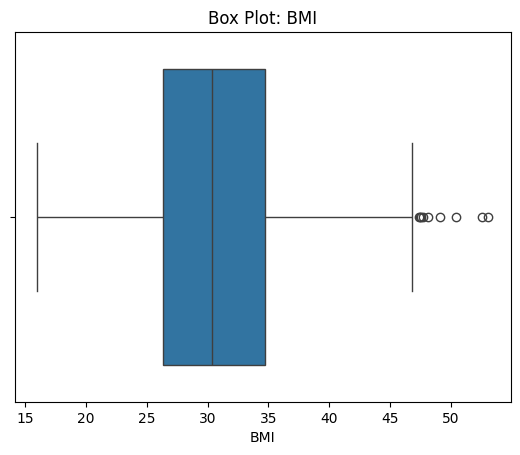

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with a 'BMI' column
sns.boxplot(x='bmi', data=data)
plt.xlabel('BMI')
plt.title('Box Plot: BMI')
plt.show()

In [50]:
# We look at the 20 largest values and 20 smalest 
top20_bmi = data["bmi"].nlargest(20)
min20_bmi = data["bmi"].nsmallest(20)
print(top20_bmi)
print(min20_bmi)

1317    53.1
1047    52.6
847     50.4
116     49.1
286     48.1
1088    47.7
860     47.6
401     47.5
543     47.4
438     46.8
547     46.7
454     46.5
660     46.5
930     46.5
549     46.2
941     46.1
1131    45.9
292     45.5
582     45.4
1024    45.3
Name: bmi, dtype: float64
172     16.0
428     16.8
1226    16.8
412     17.2
250     17.3
1029    17.3
1286    17.3
28      17.4
680     17.4
410     17.5
821     17.7
128     17.8
232     17.8
1205    17.9
198     18.0
380     18.0
950     18.3
1074    18.3
1085    18.3
1133    18.3
Name: bmi, dtype: float64


While the box plot initially suggests the presence of outliers in the higher BMI values, a closer examination of the 20 largest BMI values reveals no abnormal jumps compared to the other 19 values. Therefore, I recommend retaining the data. The same reasoning applies to the smallest value.

To ensure accuracy, we calculate z-scores. An outlier typically has a z-score greater than 3 or less than -3. Therefore, we consider any data point with a z-score beyond this range as a potential outlier

In [70]:
# Z score 
import pandas as pd
from scipy.stats import zscore
data['BMI_zscore'] = zscore(data['bmi'])
print(data)

      age     sex   bmi  children smoker     region  charges  sex_num  \
0      19  female  27.9         0    yes  southwest  16884.9        0   
1      18    male  33.8         1     no  southeast   1725.6        1   
2      28    male  33.0         3     no  southeast   4449.5        1   
3      33    male  22.7         0     no  northwest  21984.5        1   
4      32    male  28.9         0     no  northwest   3866.9        1   
...   ...     ...   ...       ...    ...        ...      ...      ...   
1333   50    male  31.0         3     no  northwest  10600.5        1   
1334   18  female  31.9         0     no  northeast   2206.0        0   
1335   18  female  36.8         0     no  southeast   1629.8        0   
1336   21  female  25.8         0     no  southwest   2007.9        0   
1337   61  female  29.1         0    yes  northwest  29141.4        0   

      smoker_num  BMI_zscore  
0              1   -0.453299  
1              0    0.514552  
2              0    0.383318  

In [69]:
outliers_df = data[data['BMI_zscore'].abs() > 3]
print(outliers_df)


      age   sex   bmi  children smoker     region  charges  sex_num  \
116    58  male  49.1         0     no  southeast  11381.3        1   
847    23  male  50.4         1     no  southeast   2438.1        1   
1047   22  male  52.6         1    yes  southeast  44501.4        1   
1317   18  male  53.1         0     no  southeast   1163.5        1   

      smoker_num  BMI_zscore  
116            0    3.024403  
847            0    3.237659  
1047           1    3.598552  
1317           0    3.680574  


The calculation indicates that there could be four potential outliers. However, our knowledge of the data leads us to trust that these values are normal, so we choose to retain them

#### Looking for outliers in Charges

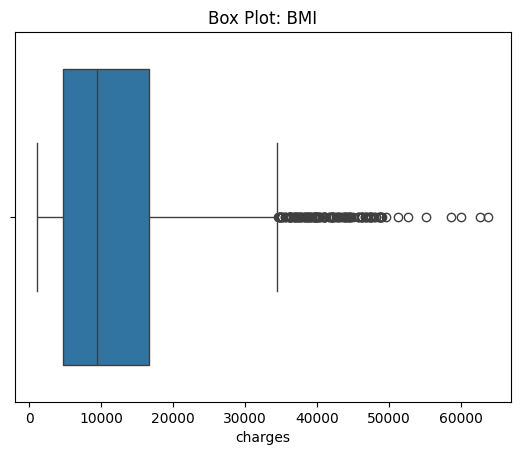

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with a 'BMI' column
sns.boxplot(x='charges', data=data)
plt.xlabel('charges')
plt.title('Box Plot: BMI')
plt.show()

While the box plot initially suggests the presence of outliers, it’s essential to consider our knowledge of the data. I’ll investigate the 20 largest and 20 smallest values to determine if any extreme or unusual values exist

In [74]:
top20_charges = data["charges"].nlargest(20)
min20_charges = data["charges"].nsmallest(20)
print(top20_charges)
print(min20_charges)

543     63770.4
1300    62592.9
1230    60021.4
577     58571.1
819     55135.4
1146    52590.8
34      51194.6
1241    49577.7
1062    48970.2
488     48885.1
175     48824.4
530     48675.5
901     48673.6
281     48549.2
330     48517.6
39      48173.4
328     47928.0
288     47896.8
55      47496.5
951     47462.9
Name: charges, dtype: float64
940     1121.9
808     1131.5
1244    1135.9
663     1136.4
22      1137.0
194     1137.5
866     1141.4
781     1146.8
442     1149.4
1317    1163.5
1251    1241.6
681     1242.3
584     1242.8
791     1252.4
487     1253.9
513     1256.3
136     1261.4
385     1261.9
723     1263.2
374     1391.5
Name: charges, dtype: float64


In [78]:
# Z -score test
data['charges_zscore'] = zscore(data['charges'])
outliers_df2 = data[data['charges_zscore'].abs() > 3]
print(outliers_df2)


      age     sex   bmi  children smoker     region  charges  sex_num  \
34     28    male  36.4         1    yes  southwest  51194.6        1   
543    54  female  47.4         0    yes  southeast  63770.4        0   
577    31  female  38.1         1    yes  northeast  58571.1        0   
819    33  female  35.5         0    yes  northwest  55135.4        0   
1146   60    male  32.8         0    yes  southwest  52590.8        1   
1230   52    male  34.5         3    yes  northwest  60021.4        1   
1300   45    male  30.4         0    yes  southeast  62592.9        1   

      smoker_num  BMI_zscore  charges_zscore  
34             1    0.941063        3.132809  
543            1    2.745531        4.171661  
577            1    1.219935        3.742161  
819            1    0.793424        3.458348  
1146           1    0.350509        3.248146  
1230           1    0.629382        3.861966  
1300           1   -0.043193        4.074391  


Although we observe potential outliers, I trust our knowledge of the data. Given the substantial number of records clustered around those values, retaining them should not adversely impact our data



### Distribution 

* We want to cheek some distribution against some of our cotinious variables , first we make a heat map to see how good evry variabel correlate 
* Darker colors indicate stronger correlations.
* Warm colors (such as red or orange) represent positive correlations (when one variable increases, the other tends to increase).
* Cool colors (such as blue or green) represent negative correlations (when one variable increases, the other tends to decrease).


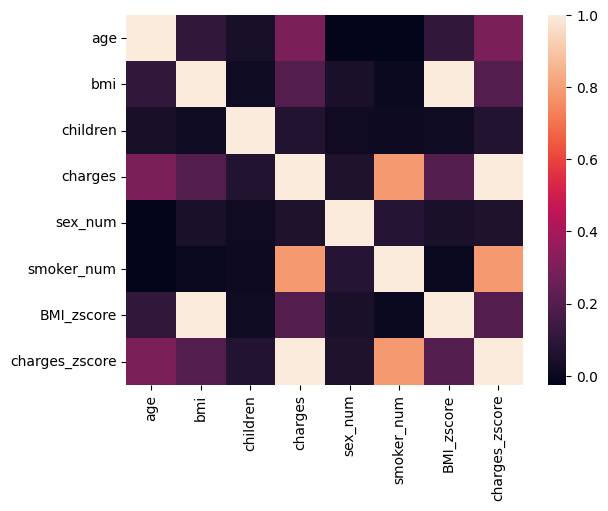

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix on numeric columns
corr = data.select_dtypes('number').corr()

# Plot the heatmap
sns.heatmap(corr)
plt.show()

We se many strong correaltions in our dataset that we want to look into . 

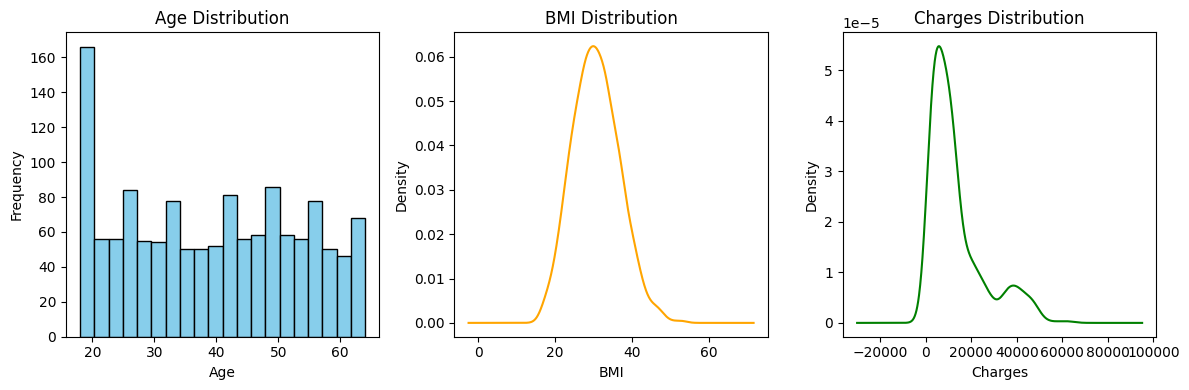

In [79]:
ig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot histograms/density plots for each column
data['age'].plot(kind='hist', bins=20, ax=axes[0], edgecolor='black', color='skyblue')
data['bmi'].plot(kind='density', ax=axes[1], color='orange')
data['charges'].plot(kind='density', ax=axes[2], color='green')

# Set titles and labels
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[1].set_title('BMI Distribution')
axes[1].set_xlabel('BMI')
axes[2].set_title('Charges Distribution')
axes[2].set_xlabel('Charges')

plt.tight_layout()
plt.show()

We observe a fairly normal curve in both the BMI distribution and the charges. However, there is a slight right skewness in the charges distribution that warrants further investigation. Most notably, our dataset contains an unusually large number of users under 20 years old.

In [146]:
# Want to make a calculation to see the number fo people under or =  20 in our dataset
under_20_count = data[data['age'] <= 20]['age'].count()
print(f"Number of individuals under 20: {under_20_count}")

Number of individuals under 20: 166


### Conclusion 1. 

* Age Distribution : The fact that we have 166 individuals under or equal to 20 years old and the next largest bin contains 80 individuals suggests a significant concentration of young people in your dataset. 
This age distribution could impact various analyses or predictions, especially if we are studying factors related to youth or specific age groups we have to take this in to further knowlege when analyze the data . 
* Tall Curve and Fast Descent on Charge distribution:
The initial tall curve suggests a concentration of charges around a specific range.
This part of the distribution likely represents that our data has a group of representants around 0-20000 , The smaller peak (hill) to the right indicates a secondary group of charges.
It suggests that there’s another distinct subset of charges with higher values in the area 30- 50 000 
* BMI distribution :  we have a verey normal bellcurved distribution in our data 





We do some furthere analyses , now Age and Charges 

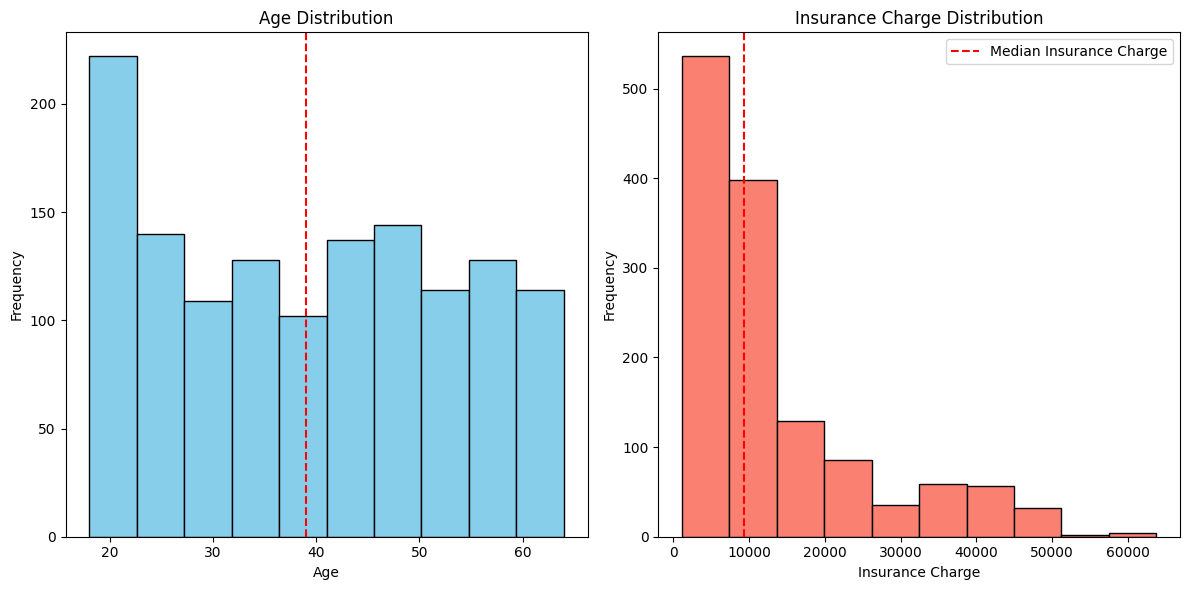

In [92]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(data['age'], bins=10, color='skyblue', edgecolor='black')
ax1.axvline(data['age'].median(), color='red', linestyle='dashed', label='Median Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.set_title('Age Distribution')

ax2.hist(data['charges'], bins=10, color='salmon', edgecolor='black')
ax2.axvline(data['charges'].median(), color='red', linestyle='dashed', label='Median Insurance Charge')
ax2.set_xlabel('Insurance Charge')
ax2.set_ylabel('Frequency')
ax2.set_title('Insurance Charge Distribution')

plt.tight_layout()
plt.legend()
plt.show()

### Conclusion 2.
* Age Distribution:
A significant portion of the population falls around 20 years old.
This suggests a relatively young customer base.
* Insurance Charge Distribution:
There’s a clear concentration of lower insurance charges.
Younger customers tend to pay less for insurance.
In summary, the data indicates that younger individuals make up a substantial part of the insured population, and they generally have lower insurance costs

### Having Children vs Bmi 

* Correlation Analysis:
The strong correlation between having children and BMI in the heat map suggests that there may be a relationship.
We can calculate the correlation coefficient (such as Pearson’s correlation) to quantify this association.
* We also want to determine if more children influence higher BMI:
i shall Compare the BMI distribution between individuals with and without children.
Consider age groups (e.g., adolescents, adults) for a more specific analysis.


Pearson correlation coefficient ® is a statistical measure that quantifies the strength and direction of the linear relationship between two quantitative variables. Here’s how to interpret it:

Range of Values:
The coefficient ranges from -1 to 1.
Positive r: Indicates a positive correlation (when one variable increases, the other tends to increase).
Negative r: Indicates a negative correlation (when one variable increases, the other tends to decrease).
r = 0: No linear relationship exists between the variables.
Strength of Correlation:
The magnitude of r indicates the strength:
Strong positive: Greater than 0.5.
Moderate positive: Between 0.3 and 0.5.
Weak positive: Between 0 and 0.3.
Weak negative: Between -0.3 and -0.5.
Moderate negative: Between -0.5 and -0.3.
Strong negative: Less than -0.5.

In [97]:
correlation = data['bmi'].corr(data['children'])
print(correlation)

0.012723842444008208


The Pearson correlation coefficient of 0.0127 indicates a very weak positive correlation between the two variables. In practical terms, this correlation is negligible and unlikely to have any significant impact

No we want to cheek if people with children has higher BMI :

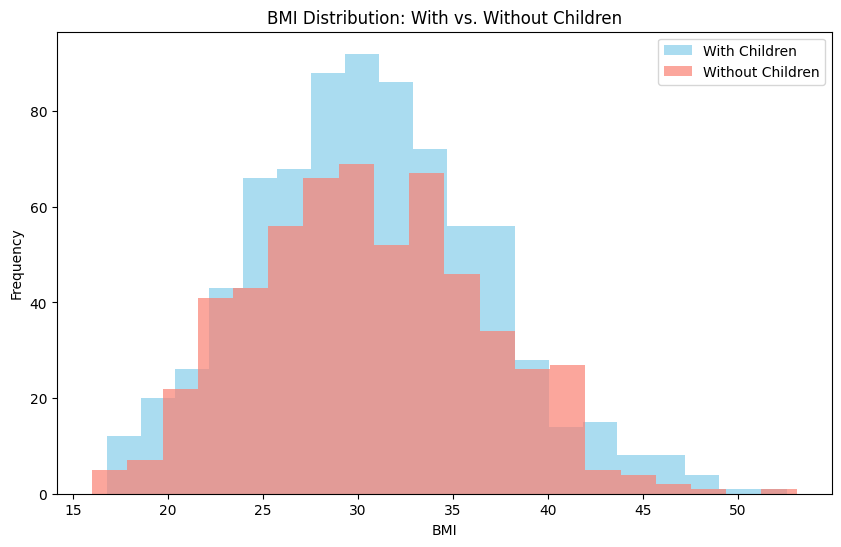

In [99]:
# Separate data into two groups: with children and without children
with_children = data[data['children'] > 0]
without_children = data[data['children'] == 0]

# Create histograms for BMI
plt.figure(figsize=(10, 6))
plt.hist(with_children['bmi'], bins=20, alpha=0.7, label='With Children', color='skyblue')
plt.hist(without_children['bmi'], bins=20, alpha=0.7, label='Without Children', color='salmon')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution: With vs. Without Children')
plt.legend()
plt.show()

### Conclusion 3.
Interesting !!! 
The difference in frequency of BMI values between individuals with and without children provides valuable insights:

Higher BMI for Parents:
Individuals with children (parents) tend to have higher BMI values.
The peak frequency in the BMI range of 25-35 is more pronounced among parents.


Potential Factors:
Parenthood may influence lifestyle, eating habits, and physical activity.
Stress, sleep disruption, and time constraints could contribute to higher BMI in parents.
In summary, having children appears associated with a higher BMI, as evident from the frequency distribution
This wil maybe lead to higher insuranse risk and higher charge ? 

What if we do the sam calculation with smokers , does smokers with cildren have a higher BMI 

### Smokers whit an whitout children VS non smokers with and whitout children 
We aim to explore interesting patterns related to smoking status, BMI, and whether individuals have children or no

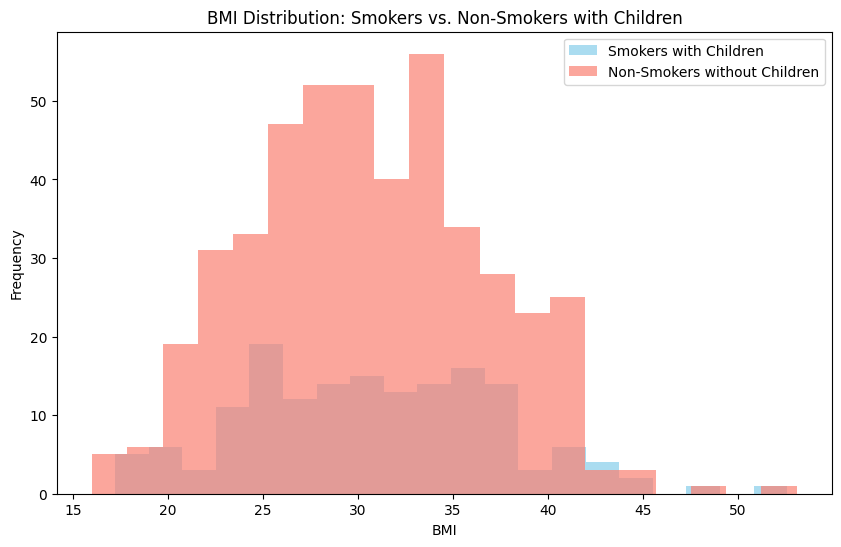

In [116]:
smokers_with_children = data[(data['smoker_num'] == 1) & (data["children"] > 0)]
non_smokers_without_children = data[(data['smoker_num'] == 0) & (data['children'] == 0)]
smokers_no_child = data[(data['smoker_num'] == 1) & (data["children"] == 0)]
no_smokers_whit_children = data[(data['smoker_num'] == 0) & (data["children"] == 1)]

# Create histograms for BMI
plt.figure(figsize=(10, 6))
plt.hist(smokers_with_children['bmi'], bins=20, alpha=0.7, label='Smokers with Children', color='skyblue')
plt.hist(non_smokers_without_children['bmi'], bins=20, alpha=0.7, label='Non-Smokers without Children', color='salmon')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution: Smokers vs. Non-Smokers with Children')
plt.legend()
plt.show()

### Statistical facts 

In [119]:
# smokers_with_children = df[(df['Smoker'] == 1) & (df['Have Children'] > 0)]
# non_smokers_without_children = df[(df['Smoker'] == 0) & (df['Have Children'] == 0)]

# Calculate mean BMI
mean_bmi_smokers_children = smokers_with_children['bmi'].mean()
mean_bmi_non_smokers_no_children = non_smokers_without_children['bmi'].mean()
mean_bmi_smokers_no_child = smokers_no_child["bmi"].mean()
mean_no_smokers_with_children = no_smokers_whit_children["bmi"].mean()
mean_population = data["bmi"].mean()

print(f"Mean BMI (Smokers with Children): {mean_bmi_smokers_children:.2f}")
print(f"Mean BMI (Non-Smokers without Children): {mean_bmi_non_smokers_no_children:.2f}")
print(f"Mean BMI (smokers No children):{mean_bmi_smokers_no_child:.2f} ")
print(f"Mean no Smokers with children:{mean_no_smokers_with_children:.2f}")
print(f"The mean of the whole popoulation is {mean_population:.2f}")

Mean BMI (Smokers with Children): 30.83
Mean BMI (Non-Smokers without Children): 30.55
Mean BMI (smokers No children):30.55 
Mean no Smokers with children:30.56
The mean of the whole popoulation is 30.66


### Conclusion 4.
The mean BMI remains nearly the same even when we segment the data into different categories. Therefore, we can assume that there is no significant difference in BMI based on smoking status or having children

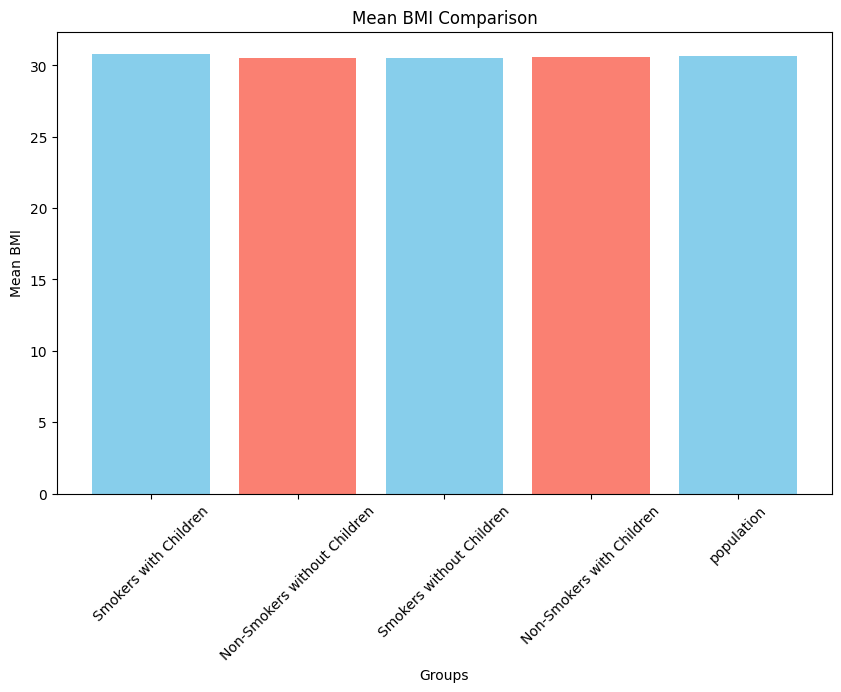

In [122]:
# We also want to plot it 

mean_bmi_smokers_children = 30.83
mean_bmi_non_smokers_no_children = 30.55
mean_bmi_smokers_no_children = 30.55
mean_bmi_non_smokers_children = 30.56
mean_population = 30.66

# Create a bar chart
groups = ['Smokers with Children', 'Non-Smokers without Children', 'Smokers without Children', 'Non-Smokers with Children', "population"]
mean_bmi_values = [mean_bmi_smokers_children, mean_bmi_non_smokers_no_children,
                   mean_bmi_smokers_no_children, mean_bmi_non_smokers_children, mean_population]

plt.figure(figsize=(10, 6))
plt.bar(groups, mean_bmi_values, color=['skyblue', 'salmon', 'skyblue', 'salmon'])
plt.xlabel('Groups')
plt.ylabel('Mean BMI')
plt.title('Mean BMI Comparison')
plt.xticks(rotation=45)
plt.show()


### Grouping data by age groups

In [133]:
# Making a bmi column with out decimals for grouping 
data['bmi_no_dec'] = data['bmi'].astype(int) 
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num,BMI_zscore,charges_zscore,age_group,Age Group,bmi_no_dec
0,19,female,28.0,0,yes,southwest,16884.9,0,1,-0.453299,0.298582,NaN,NaN,28
1,18,male,34.0,1,no,southeast,1725.6,1,0,0.514552,-0.953685,NaN,NaN,34
2,28,male,33.0,3,no,southeast,4449.5,1,0,0.383318,-0.728672,25-29,25-29,33
3,33,male,23.0,0,no,northwest,21984.5,1,0,-1.306321,0.719845,30-34,30-34,23
4,32,male,29.0,0,no,northwest,3866.9,1,0,-0.289257,-0.776798,30-34,30-34,29


In [143]:

# Define age ranges (you can adjust these as needed)
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]  # Example: 20-24, 25-29, 30-34
age_labels = ['15-19','20-24', '25-29', '30-34', "35-39", "40-44", "45-49", "50-54", "55-59", "60-65"]

# Create a new column 'Age Group' based on age ranges
data['Age Group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

max_bmi_by_age_group = data.groupby('Age Group')['bmi_no_dec'].idxmax()
highest_bmi_records = data.loc[max_bmi_by_age_group]

# Now 'highest_bmi_records' contains the individuals with the highest BMI in each age group
print(highest_bmi_records[['Age Group', 'age', 'bmi_no_dec']])
pass


     Age Group  age  bmi_no_dec
1317     15-19   18          53
1047     20-24   22          53
930      25-29   26          46
454      30-34   32          46
860      35-39   37          48
549      40-44   43          46
286      45-49   46          48
1088     50-54   52          48
116      55-59   58          49
895      60-65   61          44


/var/folders/wb/678h71sd05n7qc57gzbs_7tc0000gn/T/ipykernel_4216/1314086812.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_bmi_by_age_group = data.groupby('Age Group')['bmi_no_dec'].idxmax()


/var/folders/wb/678h71sd05n7qc57gzbs_7tc0000gn/T/ipykernel_4216/3977313592.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_bmi_by_age_group = data.groupby('Age Group')['bmi_no_dec'].idxmax()


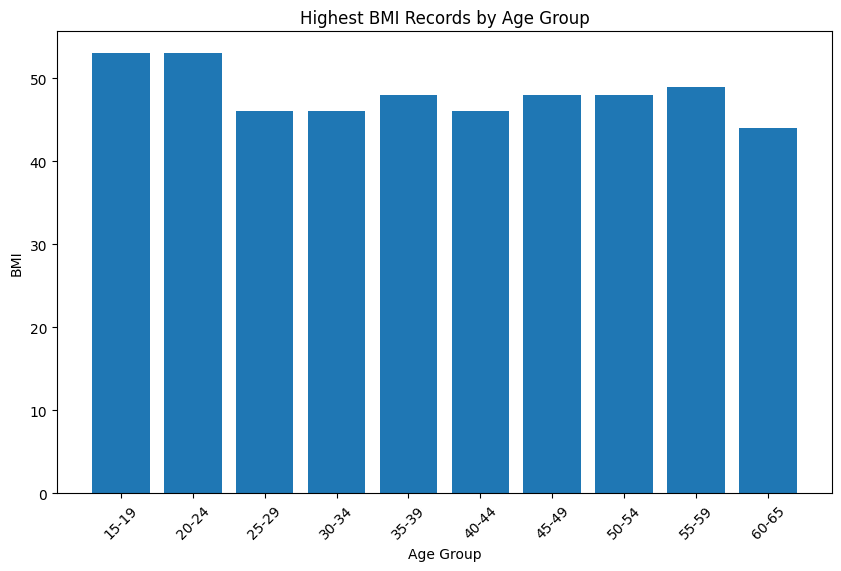

In [144]:
# We want to plot it 
max_bmi_by_age_group = data.groupby('Age Group')['bmi_no_dec'].idxmax()

# Get the records with the highest BMI in each age group
highest_bmi_records = data.loc[max_bmi_by_age_group]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(highest_bmi_records['Age Group'], highest_bmi_records['bmi_no_dec'])
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.title('Highest BMI Records by Age Group')
plt.xticks(rotation=45)
plt.show()

### Conclusion 5. 
The observation that individuals aged 15 to 25 have the highest BMI Group and constitute a significant portion of your dataset (366 out of 1300) raises several considerations:

Health Implications: The high BMI in this age group may indicate potential health risks. It’s essential to assess whether these individuals are at risk for obesity-related conditions such as diabetes, heart disease, or joint problems.
Lifestyle Factors: Investigate lifestyle factors contributing to this trend. Are there dietary habits, physical activity levels, or other behaviors that correlate with higher BMI in this age range?
Intervention Opportunities: Identifying this age group allows targeted interventions. Health programs, education, and support can focus on promoting healthier lifestyles and preventing weight-related issues.
Long-Term Trends: Monitor how BMI changes as individuals age. Does the high BMI persist into adulthood, or do patterns shift over time? on consern of insurance , those can be a health risk for future, and this group can risk a higher insuranse. 

### BMI VS region 
we want to find out if there are any big diferences to bmi by region 

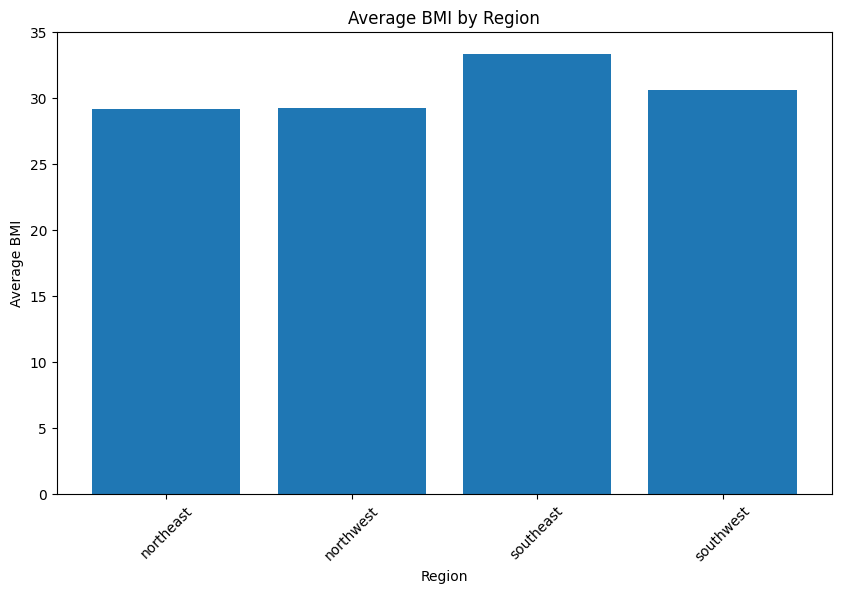

In [147]:
avg_bmi_by_region = data.groupby('region')['bmi'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(avg_bmi_by_region.index, avg_bmi_by_region.values)
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.title('Average BMI by Region')
plt.xticks(rotation=45)
plt.show()

### Smoker VS region 
We also want to see if there are any region with more smokers. 

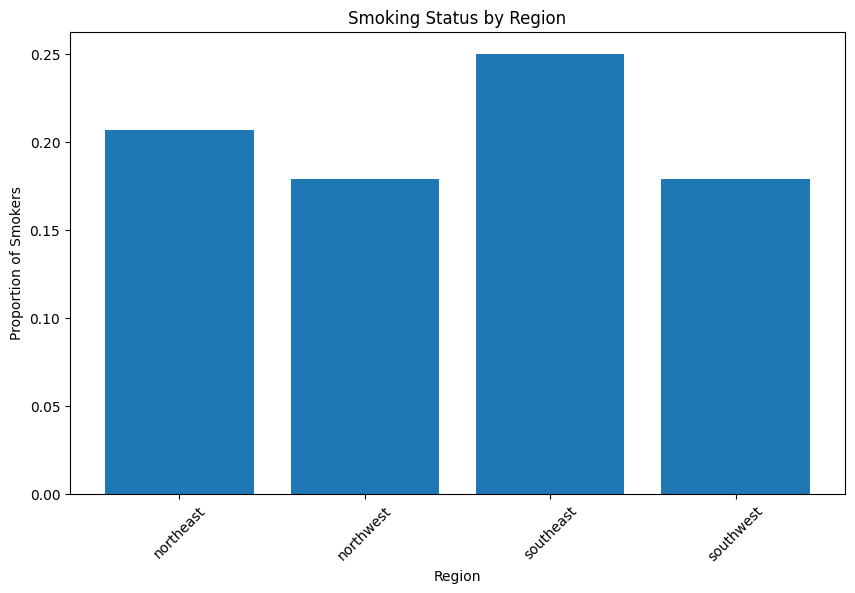

In [155]:
smoker_proportions = data.groupby('region')['smoker_num'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(smoker_proportions.index, smoker_proportions.values)
plt.xlabel('Region')
plt.ylabel('Proportion of Smokers')
plt.title('Smoking Status by Region')
plt.xticks(rotation=45)
plt.show()

In [156]:
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num,BMI_zscore,charges_zscore,age_group,Age Group,bmi_no_dec
0,19,female,28.0,0,yes,southwest,16884.9,0,1,-0.453299,0.298582,NaN,15-19,28
1,18,male,34.0,1,no,southeast,1725.6,1,0,0.514552,-0.953685,NaN,15-19,34
2,28,male,33.0,3,no,southeast,4449.5,1,0,0.383318,-0.728672,25-29,25-29,33
3,33,male,23.0,0,no,northwest,21984.5,1,0,-1.306321,0.719845,30-34,30-34,23
4,32,male,29.0,0,no,northwest,3866.9,1,0,-0.289257,-0.776798,30-34,30-34,29


### Charge by Region 

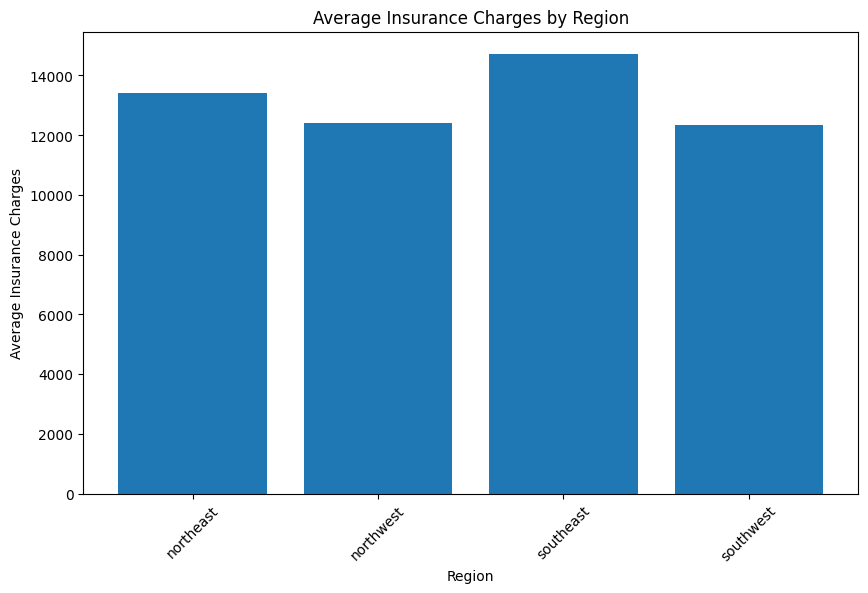

In [157]:
 #Group by region and calculate the average charges
avg_charges_by_region = data.groupby('region')['charges'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(avg_charges_by_region.index, avg_charges_by_region.values)
plt.xlabel('Region')
plt.ylabel('Average Insurance Charges')
plt.title('Average Insurance Charges by Region')
plt.xticks(rotation=45)
plt.show()

### Conclusion 6.
### Health and Costs in the Southeast Region:
* The Southeast region stands out with the highest number of smokers, indicating potential health risks.
Additionally, the region has the highest average BMI, which further emphasizes health concerns.
Correspondingly, individuals in the Southeast region pay the most in insurance charges.
* Recommendations:
Public health initiatives should focus on smoking cessation programs in the Southeast.
Encourage lifestyle changes to address high BMI and associated health risks.
Insurance companies may need to tailor policies and premiums for this region.

## Linear regression 


We start by fitting a linear regression model to understand the relationship between predictors (such as age and BMI) and insurance charges. 
For this model we use one predictor , just AGE 

In [159]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model using age as the predictor and charges as the target
X = data[['age']]  # Predictor (independent variable)
y = data['charges']  # Target (dependent variable)
model.fit(X, y)

# Get the coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (age): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

Slope (age): 257.72
Intercept: 3165.89


### The results from your linear regression model provide valuable insights:

* Slope (age):
The slope coefficient (257.72) represents the change in the dependent variable (charges) for a one-unit increase in the independent variable (age).
Specifically, for each additional year of age, the predicted insurance charges increase by approximately $257.72 (assuming all other factors remain constant).

* Intercept:
The intercept (3165.89) is the expected value of the dependent variable (charges) when all predictors (including age) are zero.
In practical terms, it represents the baseline charges for an individual with age zero (which doesn’t make sense in reality).

We also want to try with more factors :  Her we have Age and BMI 

In [160]:
# Add BMI as an additional predictor
X = data[['age', 'bmi']]  # Multiple predictors
model.fit(X, y)

# Get the updated coefficients
slope_age, slope_bmi = model.coef_
intercept = model.intercept_

print(f"Slope (age): {slope_age:.2f}")
print(f"Slope (bmi): {slope_bmi:.2f}")
print(f"Intercept: {intercept:.2f}")

Slope (age): 241.80
Slope (bmi): 332.86
Intercept: -6418.77


### The coefficients you obtained from your multiple linear regression model have the following interpretations:

* Slope (age):
For each additional year of age, the predicted insurance charges increase by approximately $241.80 (assuming all other factors remain constant).
Age is positively associated with higher charges.
* Slope (bmi):
For each additional unit increase in BMI, the predicted insurance charges increase by approximately $332.86 (assuming all other factors remain constant).
Higher BMI is associated with higher charges.
* Intercept:
The intercept (-6418.77) represents the expected charges when both age and BMI are zero (which is not practically meaningful).


##### It’s essential to consider the context and domain knowledge when interpreting the intercept.
##### Overall, this model suggests that age and BMI significantly impact insurance charges

### Now we want to see the model in action with 3 predictors . Age, bmi and smoker 

In [163]:
X = data[['age', 'bmi', 'smoker_num']]  # Predictors
y = data['charges']  # Target variable

model = LinearRegression()
model.fit(X, y)

# Example prediction for a 50-year-old non-smoker with BMI 30
new_data = pd.DataFrame({'age': [50], 'bmi': [30], 'smoker_num': [1]})
predicted_charges = model.predict(new_data)
print(f"Predicted charges: ${predicted_charges[0]:.2f}")


Predicted charges: $34799.65


## Final conclusion 

* Model for Insurance Pricing:
We’ve developed a robust regression model that our insurance company can utilize to calculate personalized insurance prices.
Users can easily adjust factors such as age, BMI, smoking status, and children to estimate their insurance costs accurately.
* Insights from Our Journey to Linear Regression:
The Southeast region stands out with the highest number of smokers and the highest BMI.
Insurance companies should consider these regional differences when selling insurance in this area.
* Youth and BMI Considerations:
Individuals aged 15 to 25 have the highest BMI within our dataset (366 out of 1300).
This finding raises important health and risk assessment considerations.
* BMI Consistency Across Categories:
The mean BMI remains consistent across different categories (smoking status and having children).
We can assume that there is no significant BMI difference based on these factors.
* BMI Frequency and Parenthood:
Parents tend to have higher BMI values.
The BMI range of 25-35 shows a pronounced peak among parents.
* Insurance Charges and Age:
Younger customers pay lower insurance charges.
Overall, younger individuals constitute a significant portion of the insured population and have generally lower insurance costs.
In summary, our data-driven insights provide actionable recommendations for insurance pricing and risk assessmen






